list, map, set

In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.86it/s]


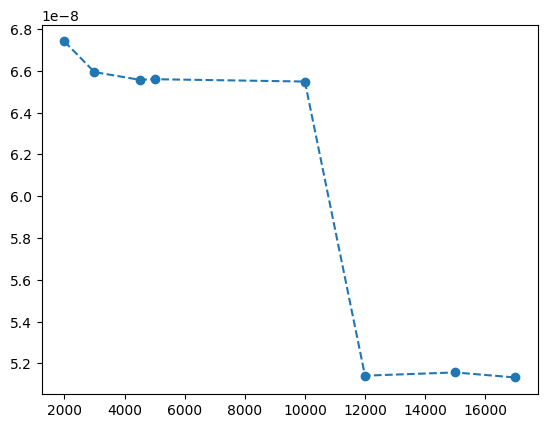

In [14]:
sizes = [2000, 3000, 4500, 5000, 10000, 12000, 15000, 17000]
times = []
for size in tqdm(sizes):
    for _ in range(100):
        x = []
        for _ in range(size):
            x.append(0)
    t0 = time.time()
    for _ in range(1000):
        x = []
        for _ in range(size):
            x.append(0)
    times.append((time.time() - t0) / 1000 / size)
plt.plot(sizes, times, "--o")

In [17]:
hash('a')

3847383845263836878

In [15]:
x = {'a': 1, 'b': 2}
x['a']

1

In [19]:
x = set({'a', 'b', 'c'})
'a' in x

True

In [24]:
import pandas as pd
import pyarrow.csv

In [25]:
t0 = time.time()
df = pd.read_csv("/mnt/postprocessing/CL_CAR_EXPERIMENT/01820/1_01820/LOGITECH_3D_POINTS_SMARTEYE_110.csv")
time.time() - t0

0.7369935512542725

In [31]:
t0 = time.time()
x = df['Landmark1_X_coord']
x += 1
time.time() - t0

0.00399327278137207

In [30]:
t0 = time.time()
for i in range(len(x)):
    x[i] += 1
time.time() - t0

2.681645154953003

In [26]:
t0 = time.time()
df = pyarrow.csv.read_csv("/mnt/postprocessing/CL_CAR_EXPERIMENT/01820/1_01820/LOGITECH_3D_POINTS_SMARTEYE_110.csv").to_pandas()
time.time() - t0

0.1502246856689453

In [32]:
import numpy as np

In [34]:
x = df['Landmark1_X_coord'].values
t0 = time.time()
x = df['Landmark1_X_coord'].values
x += 1
time.time() - t0

0.0016658306121826172

In [95]:
np.random.seed(42)
x = (np.random.randn(30, 100000) ** 2).astype(np.float32)
def f(x):
    x = np.sqrt(x)
    return x
t0 = time.time()
for _ in range(100):
    f(x)
(time.time() - t0) / 100

0.0016093039512634277

# numba

In [43]:
import numba

In [86]:
@numba.njit
def f(x):
    x = np.sqrt(x)
    return x
f(x)
t0 = time.time()
for _ in range(100):
    f(x)
(time.time() - t0) / 100

0.001441323757171631

In [92]:
@numba.njit(parallel=True)
def f(x):
    for i in numba.prange(x.shape[0]):
        x[:, i] = np.sqrt(x[:, i])
    return x
f(x)
t0 = time.time()
for _ in range(100000):
    f(x)
(time.time() - t0) / 100000

2.720587968826294e-05

In [88]:
0.0015 / (3.8e-5)

39.473684210526315

In [ ]:
global x

In [94]:
import multiprocessing
from multiprocessing.pool import ThreadPool

In [100]:
def f_mp(x):
    x = np.sqrt(x)
    return x

In [102]:
with multiprocessing.Pool(30) as p:
    res = p.map(f_mp, [x] * 30)

# Homework

1) Алгоритмически
2) Быстро питонически
3) Не должен падать

Deadline: 25.11

In [ ]:
def match_timestamps(timestamps1, timestamp2):
    """
    timestamps1: shape (N1), dtype=np.float64
    timestamps2: shape (N2), dtype=np.float64
    timestamps1, timestamps2 are sorted
    N1, N2 > 0
    N2 > N1
    """
    ...
    return idx 

In [108]:
timestamps1 = np.linspace(time.time(), time.time()+100, 100*30)
timestamps1 += np.random.randn(len(timestamps1))
timestamps1 = np.sort(timestamps1)

timestamps2 = np.linspace(time.time(), time.time()+100, 100*60)
timestamps2 += np.random.randn(len(timestamps2))
timestamps2 = np.sort(timestamps2)
timestamps1.shape, timestamps2.shape

((3000,), (6000,))

In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:26<00:00,  3.41it/s]


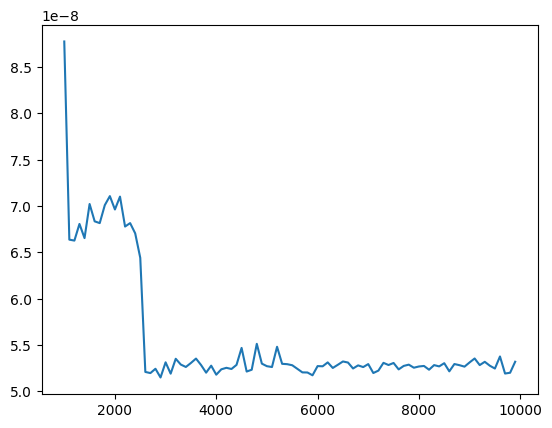

In [42]:
x = [0,0,0,0]
n_sizes = np.arange(1000, 10000, 100)
n_iter = 1000
times = []

for size in tqdm(n_sizes):
    t0 = time.time()
    for _ in range(n_iter):
        x = []
        for _ in range(size):
            x.append(0)
    times.append((time.time() - t0) / n_iter / size)
plt.plot(n_sizes, times)

In [90]:
import numba

In [ ]:
jit compiler

In [124]:
@numba.njit(parallel=True)
def f(x):
    for _ in numba.prange(100000):
        np.sqrt(x)
    return x

In [130]:
x = np.array([0] * 1000, dtype=np.float32)
t0 = time.time()
for _ in range(1000):
    f(x)
time.time() - t0

0.038945913314819336

In [120]:
x = np.array([0] * 1000, dtype=np.float32)
t0 = time.time()
for _ in range(100):
    f(x)
time.time() - t0

2.972487688064575

In [112]:
x = np.array([0] * 1000, dtype=np.float32)
t0 = time.time()
f(x)
time.time() - t0

0.0023996829986572266

In [96]:
x = np.array([0] * 1000)
t0 = time.time()
f(x)
time.time() - t0

0.0006759166717529297

In [86]:
x = [0] * 1000
t0 = time.time()
for _ in range(1000):
    for j in range(len(x)):
        x[j] += 1
time.time() - t0

0.12926244735717773

In [84]:
import numpy as np
x = np.array([1,2,3,4], dtype=np.float32)
x[0] = int(0)
x
np.array([1,2,3,4], dtype=object)

array([1., 4., 6., 8.], dtype=float32)

In [50]:
x = {'a': 0}
x['b'] = 1
x

{'a': 0, 'b': 1}

In [53]:
x = set({'a', 'b', 'c'})
x

{'a', 'b', 'c'}

In [75]:
x['a'].values

array([10002, 10003, 10004])

In [77]:
a = x['a'].values
t0 = time.time()
for _ in range(10000):
    a += 1
time.time() - t0

0.02843642234802246

In [74]:
t0 = time.time()
for _ in range(10000):
    x['a'] += 1
time.time() - t0

1.3810827732086182

In [54]:
import pandas as pd

In [72]:
t0 = time.time()
pd.read_csv("/data/home/ashilov2/trash/RPPG_VIDEO_FEATURES_122.csv")
time.time() - t0

5.071357727050781

In [70]:
import pyarrow.csv
t0 = time.time()
pyarrow.csv.read_csv("/data/home/ashilov2/trash/RPPG_VIDEO_FEATURES_122.csv").to_pandas()
time.time() - t0

0.968900203704834

In [57]:
x = pd.DataFrame({'a': [1,2,3], 'b': [3,4,5]})
x

,a,b
0,1,3
1,2,4
2,3,5


In [133]:
import multiprocessing
import threading

In [141]:
def f(x):
    for i in range(10000):
        for j in range(len(x)):
            x[j] += 1
    return x
x = [0] * 10000
xs = [x] * 5
t0 = time.time()
p = multiprocessing.Pool(5)
res = p.map(f, xs)
p.close()
print(time.time() - t0)

5.959439992904663


In [143]:
from multiprocessing.pool import ThreadPool

In [144]:

def f(x):
    for i in range(10000):
        for j in range(len(x)):
            x[j] += 1
    return x
x = [0] * 10000
xs = [x] * 5
t0 = time.time()
p = ThreadPool(5)
res = p.map(f, xs)
p.close()
print(time.time() - t0)

127.9831280708313


In [149]:
timestamps1 = np.linspace(time.time(), time.time() + 1000, 1000 * 30)
timestamps1 += np.random.randn(len(timestamps1))
timestamps1 = np.sort(timestamps1)

timestamps2 = np.linspace(time.time(), time.time() + 1000, 1000 * 60)
timestamps2 += np.random.randn(len(timestamps2))
timestamps2 = np.sort(timestamps2)

In [150]:
timestamps1[:10] - timestamps1[0]

array([0.        , 0.20686746, 0.34474158, 0.5362618 , 0.99701452,
       1.21636033, 1.39229441, 1.49304342, 1.66979432, 1.72289777])

In [148]:
timestamps2[:10] - timestamps1[0]

array([-0.60824919, -0.55871248, -0.47454333, -0.3497622 , -0.08612204,
       -0.02819943,  0.01971531,  0.03658223,  0.09713554,  0.17484307])

In [ ]:
idxs = np.zeros(timestamps2)
idx[0] = 0
idx[1] = 0
idx[9] = 1